# EDA ON AC ENERGEY CONSUMPTION:

# PROBLEM STATEMENT:

DATA CONTAINS POWER FOR MULTIPLE ACS AT SOME HOTEL IN GURGAON

-- >IDENTIFY PATTERNS/TRENDS IN THE DATA? - DONE

--> WHICH AC WAS USED THE MOST/LEAST? - DONE

OPTIONAL (BONUS QUESTION):

--> RELATE THIS POWER DATA WITH THE OUTSIDE TEMPREATURE OF GURGAON.(FEEL FREE TO USE TEMPERATURE DATA FROM ANY WEBSITE ONLINE.HOW WILL YOU FETCH THAT DATA IN YOUR ANALYSIS?

--> USING THE POWER DATA,PREDICT/FORCASTE THE POEWR CONSUMPTION?

# 1. IMPORTING THE DATA TO VARIABLE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("AC_Data.csv")

In [3]:
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


# INFORMATION ABOUT THE DATASET:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87840 non-null  object 
 1   AC 1    43708 non-null  float64
 2   AC 2    43711 non-null  float64
 3   AC 3    43713 non-null  float64
 4   AC 4    43704 non-null  float64
 5   AC 5    43716 non-null  float64
 6   AC 6    43717 non-null  float64
 7   AC 7    43679 non-null  float64
 8   AC 8    43704 non-null  float64
 9   AC 9    43654 non-null  float64
 10  AC 10   43690 non-null  float64
 11  AC 11   43670 non-null  float64
 12  AC 12   43713 non-null  float64
 13  AC 13   43719 non-null  float64
 14  AC 14   43696 non-null  float64
 15  AC 15   43715 non-null  float64
 16  AC 16   43710 non-null  float64
 17  AC 17   43714 non-null  float64
 18  AC 18   43723 non-null  float64
dtypes: float64(18), object(1)
memory usage: 12.7+ MB


NO OF ROWS ----> 87840

NO OF COLUMNS ----> 19

THE FIRST COLUMNS HAVE "object" & REST OF THE COLUMNS HAVE "float64" TYPE OF DATA.

DTYPES: FLOAT64(18), OBJECT(1)

AS PER THE INFORMATION A LOT OF NULL VALUE PRESENT IN ALL THE COLUMNS EXCEPT FIRST COLUMN("0") FIRST COLUMNS HAS 0 NULL VALUES.

# FINDING THE NUMBER OF NULL VALUES PRESENT INSIDE THE DATASET:

In [5]:
df.isnull().sum()

0            0
AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

# FINDING THE PERCENTAGE OF NULL VALUES PRESENT INSIDE EVERY COLUMN OF THE DATASET:

In [6]:
# Make a list of feature which is having null values or missing values:

Feature_with_na=[i for i in df.columns if df[i].isnull().sum()>1]
print(Feature_with_na)
print("\n")

# Here we will check the parcentage of missing values present inside each feature:

for i in Feature_with_na:
    print(i,np.round(df[i].isnull().mean(),4),"% missing values")

['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16', 'AC 17', 'AC 18']


AC 1 0.5024 % missing values
AC 2 0.5024 % missing values
AC 3 0.5024 % missing values
AC 4 0.5025 % missing values
AC 5 0.5023 % missing values
AC 6 0.5023 % missing values
AC 7 0.5027 % missing values
AC 8 0.5025 % missing values
AC 9 0.503 % missing values
AC 10 0.5026 % missing values
AC 11 0.5028 % missing values
AC 12 0.5024 % missing values
AC 13 0.5023 % missing values
AC 14 0.5026 % missing values
AC 15 0.5023 % missing values
AC 16 0.5024 % missing values
AC 17 0.5023 % missing values
AC 18 0.5022 % missing values


REASON FOR NOT TO FILL THE MISSING VALUES USING MEAN, MEDIAN or MODE VALUES AS FROM DATASET WE CAN SURELY SEE THAT IS THE ENERGEY CONSUMPTION IS 7.518632 JOULES OR KW IN 1 MINUTE WE CAN'T SAY THAT IT WILL BE 2-3 JOULES AT MINUTE 2 BUT THE 3RD ROW CONTRADICTS THE JUDGEMENT WHERES AFTER 2 MINUTES THE CONSUMPTION IS STILL 7.426114 WHICH IS ALMOST IN SIMILAR RANGE TO MINUTE 1.

BEST CASE IS WE DROP ALL THE MISSING VALUES FROM DATASET WE STILL HAVE DATA OF EVERY OTHER 2 MINUTES WHICH IS CASE OF ENERGEY CONSUMPTION WE CAN PERFECTELY USE IT TO FORECAST/EDA OF THE ENERGY CONSUMPTION BY AC.

# DROP ALL THE NULL VALUES FROM EVERY ROW OF DATASET AND RESET THE INDEX:

In [7]:
df_new=df.dropna().reset_index()

In [8]:
df_new.head()

,index,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2,4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
3,6,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
4,8,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474


# SHAPE OF DATASET AFTER DROP ALL THE NULL VALUES FROM ROWS:

In [9]:
df_new.shape

(34642, 20)

NO OF ROWS ----> 34642

NO OF COLUMNS ----> 20

AS WE SEE AFTER DROPING THE ROWS WHICH IS CONTAIN THE "NAN" VALUE THE NUMBER OF ROW WILL BE REDUCE FROM "87840" TO "34642" MEANS THERE ARE "53198" ROWS WHICH CONTAIN "NAN" VALUES.

# RENAME THE COLUMNS OF DATASET:

In [10]:
df_new.rename(columns={'0':'Timestamp',"AC 3":"AC3","AC 4":"AC4"}, inplace=True) 

In [11]:
df_new.head()

,index,Timestamp,AC 1,AC 2,AC3,AC4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2,4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
3,6,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
4,8,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474


# DROP THE INDEX COLUMNS:

BECAUSE THERE IS NO USE OF INDEX COLUMNS

In [12]:
df_new.drop('index',axis = 1, inplace=True)

In [13]:
df_new.head()

,Timestamp,AC 1,AC 2,AC3,AC4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
3,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
4,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474


# DESCRIBE THE DATASET (STASTICAL ANALYSIS):

In [14]:
df_new.describe()

,AC 1,AC 2,AC3,AC4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000,34642.000000
mean,2.394089,3.872065,2.504698,2.313283,1.466444,2.709061,2.945136,2.568989,3.149919,1.539393,2.486162,2.815970,4.313004,2.957060,4.124136,2.765703,4.255119,6.453815
std,2.309156,2.360155,1.452713,1.705811,0.748515,1.590249,1.487934,1.531968,1.534838,0.700372,1.588902,1.402622,1.872007,1.505043,2.003805,1.538245,1.078238,2.249975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.272895,1.663072,1.279719,1.008326,1.877316,2.161931,1.766606,2.273552,1.106887,1.640117,2.066214,3.273092,1.855093,3.025756,1.867401,3.773065,4.006869
50%,2.081296,3.738743,2.417197,2.255593,1.408948,2.819162,2.976191,2.622136,3.046702,1.500257,2.409043,2.824786,4.239078,2.794645,4.092966,2.685934,4.624716,7.072846
75%,3.767716,5.334570,3.351791,3.313595,1.903034,3.742868,3.852767,3.538364,4.046424,1.977836,3.362753,3.660599,5.433044,3.892646,5.409613,3.701203,4.977744,8.252815
max,11.194789,11.147141,8.430909,9.849144,5.495358,9.929291,9.356776,9.331506,10.026747,4.625030,10.363151,9.887306,9.796393,9.054969,10.349998,9.789502,5.950261,11.040031


# DATA PREPROCESSING:

HERE WE ONLY HAVE TIMESTAMP FOR SO WE EXTRACT AS MUCH INFO AS WE CAN FROM DATE

# CONVERT TIMESTAMP DATATYPE & EXTRACTING INFORMATION:

In [15]:
# CONVERTING:

df_new["Timestamp"]=pd.to_datetime(df_new["Timestamp"])


In [16]:
# EXTRACTING:

df_new['Year'] =df_new['Timestamp'].dt.year
df_new['Month'] = df_new['Timestamp'].dt.month
df_new['week_day'] = df_new['Timestamp'].dt.weekday
df_new['Day'] = df_new['Timestamp'].dt.day
df_new['Weekofyear'] = df_new['Timestamp'].dt.weekofyear
df_new['Hour'] = df_new['Timestamp'].dt.hour
df_new['Minute'] = df_new['Timestamp'].dt.minute


In [17]:
df_new.head()

,Timestamp,AC 1,AC 2,AC3,AC4,AC 5,AC 6,AC 7,AC 8,AC 9,...,AC 16,AC 17,AC 18,Year,Month,week_day,Day,Weekofyear,Hour,Minute
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,4.113460,3.305072,6.735981,2019,8,3,1,31,0,0
1,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,3.986483,3.220588,6.379500,2019,8,3,1,31,0,2
2,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,3.797881,3.131560,6.363475,2019,8,3,1,31,0,4
3,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,...,3.062610,3.063953,6.127366,2019,8,3,1,31,0,6
4,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,...,2.640150,2.864680,5.662474,2019,8,3,1,31,0,8


# CONVERTING WEEKDAYS FROM NUMERICAL VALUES TO CATEGORICAL VALUES.

In [18]:
df_new["week_day"].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [19]:
def weekdaytoname(day):
    if day == 0:
        name = 'Monday'
    elif day == 1:
        name = 'Tuesday'
    elif day == 2:
        name = 'Wednesday'
    elif day == 3:
        name = 'Thursday'
    elif day == 4:
        name = 'Friday'
    elif day == 5:
        name = 'Saturday'
    elif day == 6:
        name = 'Sunday'
    
    return name

In [20]:
df_new['Week_day_Name'] = df_new['week_day'].apply(weekdaytoname)

In [21]:
df_new.head()

,Timestamp,AC 1,AC 2,AC3,AC4,AC 5,AC 6,AC 7,AC 8,AC 9,...,AC 17,AC 18,Year,Month,week_day,Day,Weekofyear,Hour,Minute,Week_day_Name
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,3.305072,6.735981,2019,8,3,1,31,0,0,Thursday
1,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,3.220588,6.379500,2019,8,3,1,31,0,2,Thursday
2,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,3.131560,6.363475,2019,8,3,1,31,0,4,Thursday
3,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,...,3.063953,6.127366,2019,8,3,1,31,0,6,Thursday
4,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,...,2.864680,5.662474,2019,8,3,1,31,0,8,Thursday


# DROPING THE YEAR COLUMNS:

THERE THE "YEAR" COLUMNS BECAUSE INSIDE THE "YEAR" COLUMNS SINGLE VALUE CONTAIN "2019" SO WE DROP ALL THE ROWS BECAUSE THERE IS NO USE OF "YEAR" COLUMNS DUE CONATIN SINGLE VALUE IN EACH ROW.

In [22]:
df_new.drop(['Year'],axis = 1,inplace=True)

In [23]:
df_new.head()

,Timestamp,AC 1,AC 2,AC3,AC4,AC 5,AC 6,AC 7,AC 8,AC 9,...,AC 16,AC 17,AC 18,Month,week_day,Day,Weekofyear,Hour,Minute,Week_day_Name
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,4.113460,3.305072,6.735981,8,3,1,31,0,0,Thursday
1,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,3.986483,3.220588,6.379500,8,3,1,31,0,2,Thursday
2,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,3.797881,3.131560,6.363475,8,3,1,31,0,4,Thursday
3,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,...,3.062610,3.063953,6.127366,8,3,1,31,0,6,Thursday
4,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,...,2.640150,2.864680,5.662474,8,3,1,31,0,8,Thursday


# CONVERTING HOURS FROM NUMERICAL VALUES TO CATEGORICAL VALUES.

In [24]:
df_new["Hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [25]:
def hours_to_timing(hour):
    if hour in [22, 23, 0, 1, 2, 3]:
        timing = 'Night'
    elif hour in range(4, 12):
        timing = 'Morning'
    elif hour in range(12, 17):
        timing = 'Afternoon'
    elif hour in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

In [26]:
df_new['Timing'] = df_new['Hour'].apply(hours_to_timing)

In [27]:
df_new.head()

,Timestamp,AC 1,AC 2,AC3,AC4,AC 5,AC 6,AC 7,AC 8,AC 9,...,AC 17,AC 18,Month,week_day,Day,Weekofyear,Hour,Minute,Week_day_Name,Timing
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,3.305072,6.735981,8,3,1,31,0,0,Thursday,Night
1,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,3.220588,6.379500,8,3,1,31,0,2,Thursday,Night
2,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,3.131560,6.363475,8,3,1,31,0,4,Thursday,Night
3,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,...,3.063953,6.127366,8,3,1,31,0,6,Thursday,Night
4,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,...,2.864680,5.662474,8,3,1,31,0,8,Thursday,Night


# CONVERTING MONTHS FROM NUMERICAL VALUES TO CATEGORICAL VALUES.

In [28]:
df_new["Month"].unique()

array([8, 9], dtype=int64)

In [29]:
df_new['Month_Name'] = df_new['Month'].replace({8: 'August', 9 : 'September'})

In [30]:
df_new.head()

,Timestamp,AC 1,AC 2,AC3,AC4,AC 5,AC 6,AC 7,AC 8,AC 9,...,AC 18,Month,week_day,Day,Weekofyear,Hour,Minute,Week_day_Name,Timing,Month_Name
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,6.735981,8,3,1,31,0,0,Thursday,Night,August
1,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,6.379500,8,3,1,31,0,2,Thursday,Night,August
2,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,6.363475,8,3,1,31,0,4,Thursday,Night,August
3,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,...,6.127366,8,3,1,31,0,6,Thursday,Night,August
4,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,...,5.662474,8,3,1,31,0,8,Thursday,Night,August


# AGGREGATING THE AC POWER COMSUPTION PER MINUTE IN EVERY DAY:

In [31]:
df_new['Total'] = df_new[['AC 1', 'AC 2', 'AC3', 'AC4', 'AC 5', 'AC 6', 'AC 7',
       'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15',
       'AC 16', 'AC 17', 'AC 18']].sum(axis=1)

In [32]:
df_new.head()

,Timestamp,AC 1,AC 2,AC3,AC4,AC 5,AC 6,AC 7,AC 8,AC 9,...,Month,week_day,Day,Weekofyear,Hour,Minute,Week_day_Name,Timing,Month_Name,Total
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,8,3,1,31,0,0,Thursday,Night,August,65.393197
1,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,8,3,1,31,0,2,Thursday,Night,August,64.762056
2,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,8,3,1,31,0,4,Thursday,Night,August,65.791277
3,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,...,8,3,1,31,0,6,Thursday,Night,August,63.779666
4,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,...,8,3,1,31,0,8,Thursday,Night,August,61.997570


# TOTAL POWER COMSUPTION BY EACH AND EVERY AC:

In [33]:
total_consumption_per_unit = df_new[['AC 1', 'AC 2', 'AC3', 'AC4', 'AC 5', 'AC 6', 'AC 7',
       'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15',
       'AC 16', 'AC 17', 'AC 18']].sum(axis=0).rename_axis('AC Unit').reset_index(name='Total')

In [34]:
total_consumption_per_unit

,AC Unit,Total
0,AC 1,82936.044911
1,AC 2,134136.090605
2,AC3,86767.765132
3,AC4,80136.762231
4,AC 5,50800.569898
5,AC 6,93847.294549
6,AC 7,102025.387626
7,AC 8,88994.932128
8,AC 9,109119.503611
9,AC 10,53327.657137


# TOTAL ENERGEY CONSUMPTION (HOURLEY) TO SEE IF ANY CHANGES HOURELY

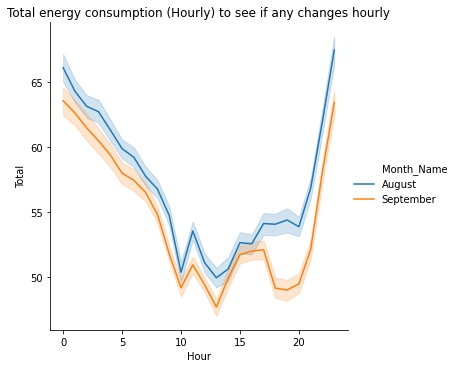

In [35]:
sns.relplot(x = 'Hour', y = 'Total', data = df_new, kind= 'line',hue='Month_Name', sort = True )
plt.title('Total energy consumption (Hourly) to see if any changes hourly')
plt.show()

# TOTAL ENERGEY CONSUMPTION (DAYWISE) TO SEE IF ANY CHANGES HOURELY:

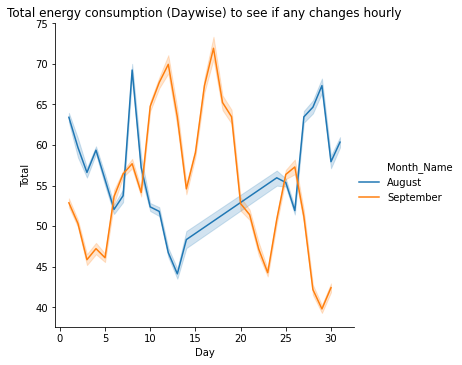

In [36]:
sns.relplot(x = 'Day', y = 'Total', data = df_new, kind= 'line',hue='Month_Name')
plt.title('Total energy consumption (Daywise) to see if any changes hourly')
plt.show()

# TOTAL AC ENERGEY CONSUMPTION DISTRIBUTION:

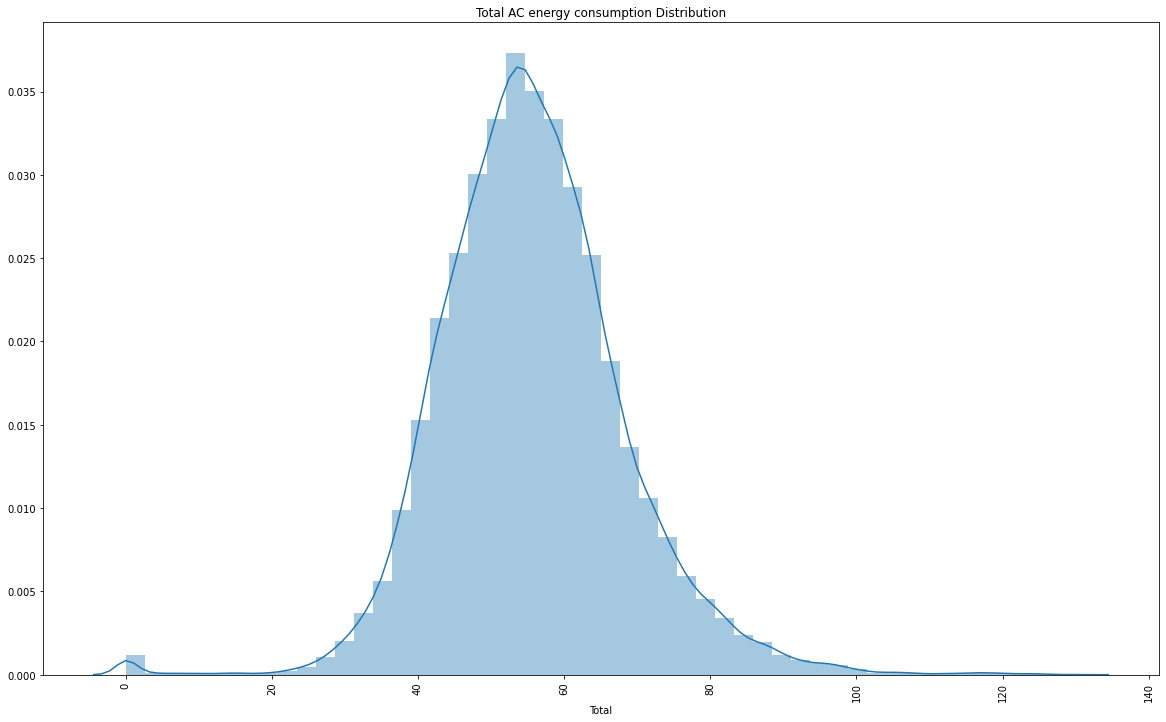

In [37]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.distplot(df_new['Total'])
plt.title('Total AC energy consumption Distribution')
plt.show()

# Q.1 IS THERE ANY RELATIONSHIP IN POWER CONCUMPTION WITH RESPECT TO TIME?

THE OVERALL POWER CONSUMPTION IS MORE DURING 12:00AM NIGHT TO 4:00AM AND 9PM TO 11PM. THE REASON IS PEOPLE COME FOR VACCATION OR OUTING AROUND 8PM THEN THEY HAVE DINNER THEN COME TO BED TO SLEEP AND USE AC ALL NIGHT.

# OVERALL POWER CONSUMPTION AT EACH TIMING OF THE DAY:

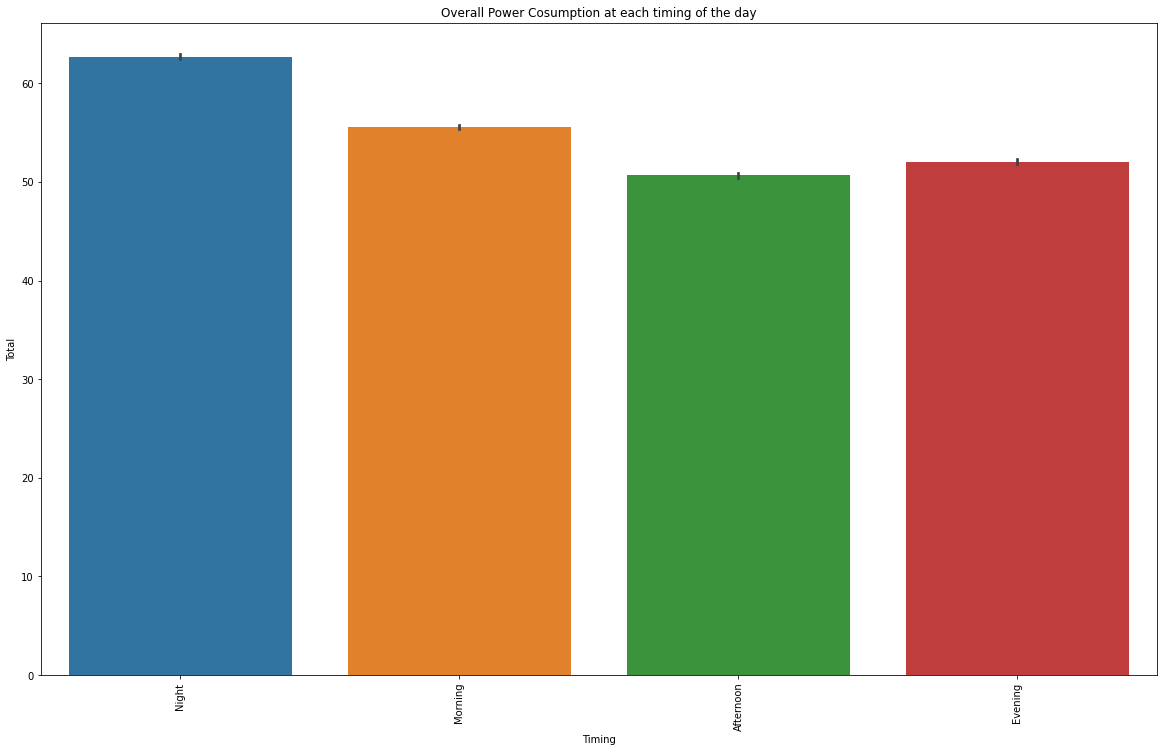

In [38]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.barplot(x=df_new['Timing'], y=df_new['Total'])
plt.title('Overall Power Cosumption at each timing of the day')
plt.show()

# OVERALL POWER COMPUTION AT EACH HOUR OF THE DAY:

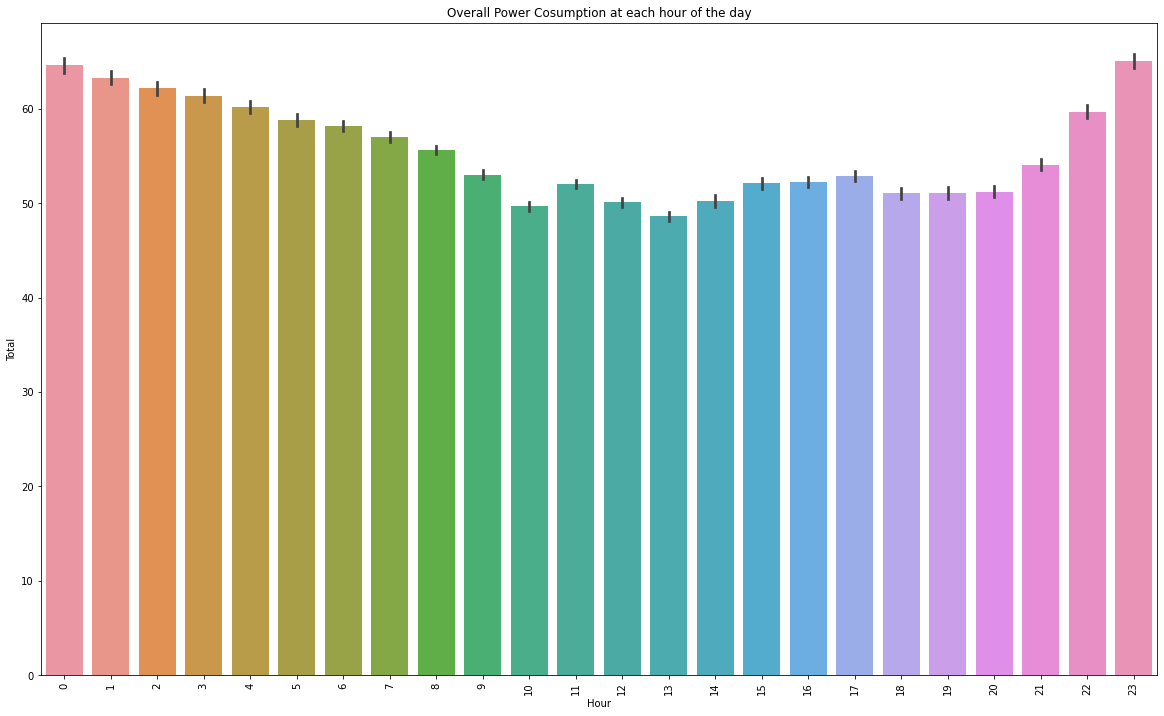

In [39]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.barplot(x=df_new['Hour'], y=df_new['Total'])
plt.title('Overall Power Cosumption at each hour of the day')
plt.show()

# Q2.WHICH AC WAS USED THE MOST/LEAST?

In [40]:
total_max = df_new[['AC 1', 'AC 2', 'AC3', 'AC4', 'AC 5', 'AC 6', 'AC 7',
       'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15',
       'AC 16', 'AC 17', 'AC 18']].max(axis=0).rename_axis('AC Unit').reset_index(name='Maximum_Power_consumption')

In [41]:
total_max

,AC Unit,Maximum_Power_consumption
0,AC 1,11.194789
1,AC 2,11.147141
2,AC3,8.430909
3,AC4,9.849144
4,AC 5,5.495358
5,AC 6,9.929291
6,AC 7,9.356776
7,AC 8,9.331506
8,AC 9,10.026747
9,AC 10,4.625030


# WHICH 5 AC ARE CONSUMING MORE POWER(DAYWISE):

In [42]:
total_max_new=total_max.sort_values("Maximum_Power_consumption",ascending=False).reset_index()

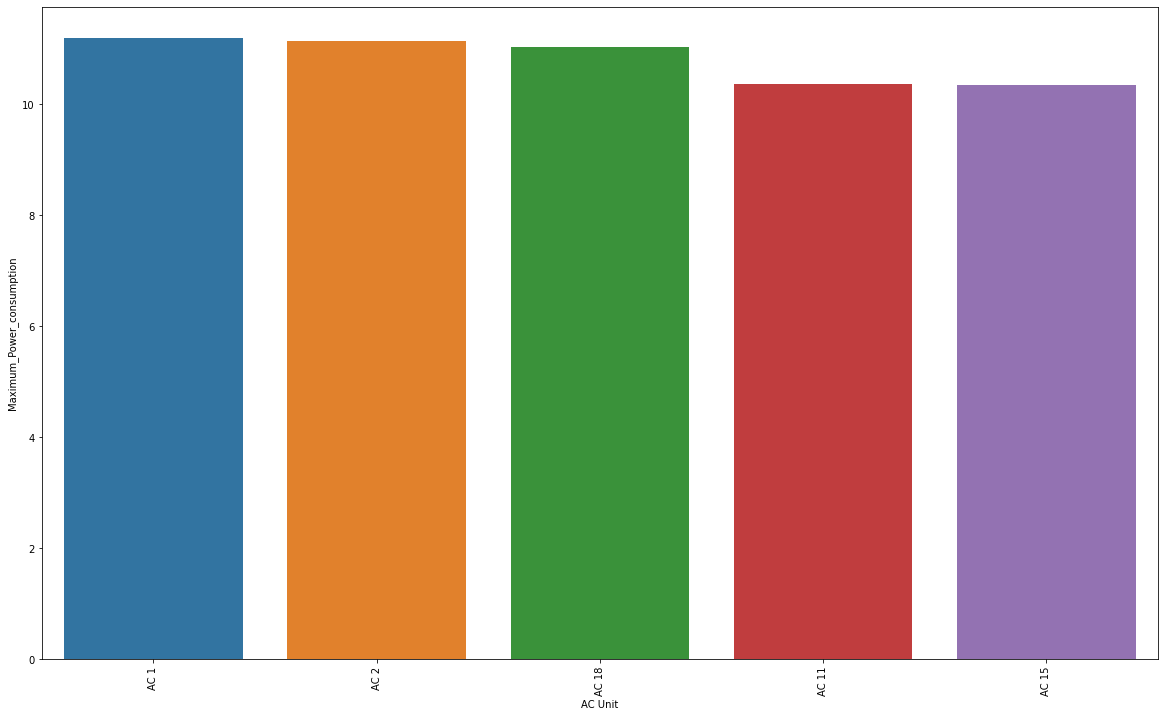

In [43]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.barplot(x="AC Unit",y="Maximum_Power_consumption",
            data=total_max.sort_values("Maximum_Power_consumption",ascending=False).reset_index()[:5])
plt.show()

# ON A DAYWISE:

AC 1 :: 11.1947890625 

AC 2 :: 11.147140625

AC 18 :: 11.04003125

AC 11 :: 10.3631513672

AC 15 :: 10.3499980469

# WHICH 5 AC ARE CONSUMING MORE POWER(THROUGHT MONTHS):

In [44]:
total_consumption_per_unit.sort_values("Total",ascending=False).reset_index()

,index,AC Unit,Total
0,17,AC 18,223573.076079
1,12,AC 13,149411.074408
2,16,AC 17,147405.838816
3,14,AC 15,142868.332861
4,1,AC 2,134136.090605
5,8,AC 9,109119.503611
6,13,AC 14,102438.459866
7,6,AC 7,102025.387626
8,11,AC 12,97550.845176
9,15,AC 16,95809.474174


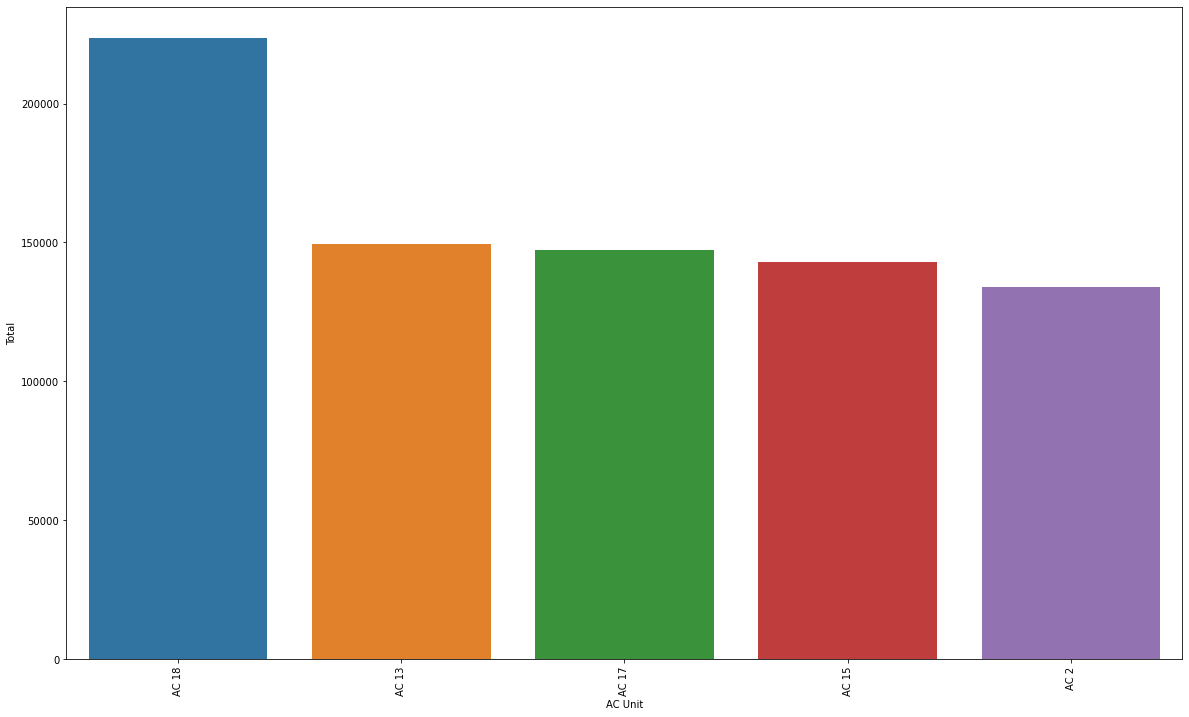

In [45]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.barplot(x="AC Unit",y="Total",
            data=total_consumption_per_unit.sort_values("Total",ascending=False).reset_index()[:5])
plt.show()

# OVERALL THROUGHT MONTHS:

AC 18 ::    223573.076079

AC 13 ::    149411.074408

AC 17 ::    147405.838816

AC 15 ::    142868.332861

AC 2  ::    134136.090605

# WHICH 5 AC ARE CONSUMING LEAST POWER(DAYWISE):

In [46]:
total_max.sort_values("Maximum_Power_consumption",ascending=True).reset_index()

,index,AC Unit,Maximum_Power_consumption
0,9,AC 10,4.625030
1,4,AC 5,5.495358
2,16,AC 17,5.950261
3,2,AC3,8.430909
4,13,AC 14,9.054969
5,7,AC 8,9.331506
6,6,AC 7,9.356776
7,15,AC 16,9.789502
8,12,AC 13,9.796393
9,3,AC4,9.849144


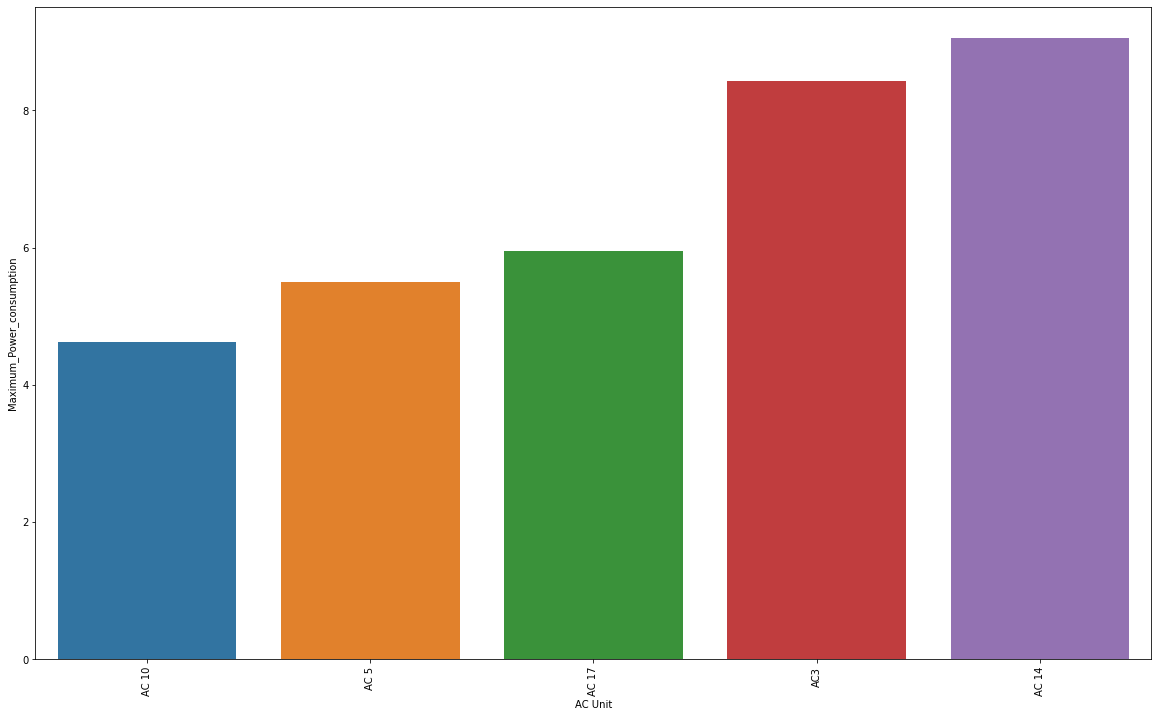

In [47]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.barplot(x="AC Unit",y="Maximum_Power_consumption",
            data=total_max.sort_values("Maximum_Power_consumption",ascending=True).reset_index()[:5])
plt.show()

# ON A DAYWISE:

AC 10 :: 4.625030

AC 5 :: 5.495358

AC 17 :: 5.950261

AC 3 :: 8.430909

AC 14 :: 9.054969

# WHICH 5 AC ARE CONSUMING LEAST POWER(THROUGHT MONTHS):

In [48]:
total_consumption_per_unit.sort_values("Total",ascending=True).reset_index()

,index,AC Unit,Total
0,4,AC 5,50800.569898
1,9,AC 10,53327.657137
2,3,AC4,80136.762231
3,0,AC 1,82936.044911
4,10,AC 11,86125.618895
5,2,AC3,86767.765132
6,7,AC 8,88994.932128
7,5,AC 6,93847.294549
8,15,AC 16,95809.474174
9,11,AC 12,97550.845176


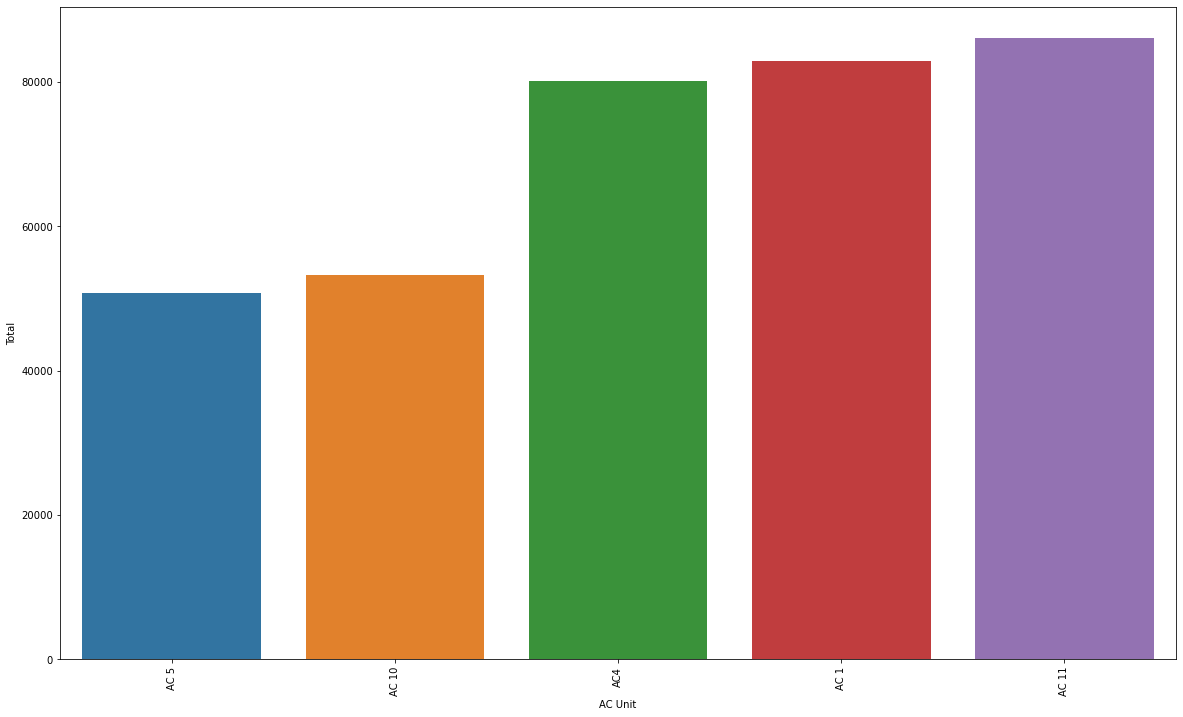

In [49]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.barplot(x="AC Unit",y="Total",
            data=total_consumption_per_unit.sort_values("Total",ascending=True).reset_index()[:5])
plt.show()

# OVERALL THROUGHT MONTHS:

AC 5 :: 50800.569898

AC 10 :: 53327.657137

AC 4 :: 80136.762231

AC 1 :: 82936.044911

AC 11 :: 86125.618895

# SUMMARY:-

1. IN THE MONTHS OF AUGUST THE AC CONSUMPTION IS MORE.THE REASON IS THE AVARAGE HIGH-TEMPERATURE OF GURGAON AT GIVEN TIME PERIOD APPROX IS 34.5°C (94.1°F), AND THE AVARAGE LOW-TEMPERATURE IS 25.9°C (78.6°F) WHICH IS CONSIDERED AS HOT TEMPREATURE.

2. THE OVERALL POWER CONSUMPTION IS MORE DURING 12:00AM NIGHT TO 4:00 AM AND 9PM to 11PM. THE REASON IS PEOPLE RETURN FROM VACATION OR OUTGOING AROUND 8PM THEN THEY HAVE DINNER THEN COME TO BED TO SLEEP AND USE AC ALL NIGHT.

3. SO THE POWER CONSUMPTION IS MORE DURING NIGHT, WHEN EVERYBODY SLEEPS IN A HOTEL. DUE TO LACK OF DATA WE CANNOT SAY WHETHER AC IS OF ROOMS OR OTHER AREAS AS WELL lIKEWISE GYM, SPA, LOBBY. TO TEST THIS HYPOTHESIS WE NEED MORE ACCURATE DATA.

4. AC-18, AC-15, AC-2 ARE CONSUMING THE MOST ENERGEY ON A DAY BASIS AS WELL AS OVERALL THROUGHT YEAR.

5. AC-10 , AC-5 ARE LEST ENERGEY CONSUMING AC ON A HOTEL. THEY BOTHE AS OVERALL AS WELL AS DAY BASIC LESS ENERGY CONSUMPTION AS COMPARED TO OTHER